In [58]:
using DataFrames
using CSV
using Images
using Augmentor

using MyLib

# Load Data

## 11K Hand Dataset

This notebook used 11K Hand Dataset, download the data set from `https://sites.google.com/view/11khands`

In [101]:
csv_file = "HandInfo.csv"
img_dir_root = "img/Hands"

# Transformations to apply on images
# Example:
#        pl = (1=>FlipX()) * (1=>FlipY) * (2=>NoOp()) |> Resize(128,128)
# 
# the above pipeline would randomly Flip image in X or Y axis 25% of the time each. And 50% of the time
# it would keep the image as is.
# The pipeline would always resize the image to 128x128
#
tfrm = (1=>FlipX()) * (1=>FlipY()) * (2=>NoOp()) |> Resize(128,128)

# Number of images to create tensor with while iterating over the dataset
batch_size = 32


function loadhands(csv_file, img_dir_root, batch_size, tfrm)
    df = CSV.read(csv_file)
    filenames = joinpath.(img_dir_root, df[:imageName])
    targets = df[:gender]
    d = ImageDataset(filenames, targets)
    o = ImageDatasetLoader(d, batch_size, tfrm, true; seed=100)
    return o
end

ds = loadhands(csv_file, img_dir_root, batch_size, tfrm)

ImageDatasetLoader: 11076 Images
	bs: represents batch size
	tfrm: describes the Augmentor transformations on applied on images


- Object `ds` is an iterator that would return a tuple of `(data{tensor}, target{vector})` after transforming the images
with the specified transformations.
- Object `ds` can also be accessed by index in which case it would return a single record

In [131]:
println("Length of ds $(length(ds))")

(data,target), _ = iterate(ds)
data

Length of ds 11076


128×128×3×32 Array{Float64,4}:
[:, :, 1, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.

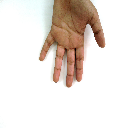

In [142]:
# Convert image number n from tensor to colorview
n=18
colorview(RGB, permutedims(data[:,:,:,n], (3,1,2)))